<a href="https://colab.research.google.com/github/robertostl/Football-Prediction/blob/main/ExploratoryDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We want to analyze the datasets created previusly with all the features taht we consider important to predict the result of the match

In [2]:
#conexion al drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
#librerias necesarias
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#importación de los ficheros
df22 = pd.read_csv('/content/drive/My Drive/SD/SD2022_p2.csv',sep=',',)
df19 = pd.read_csv('/content/drive/My Drive/SD/SD2019_p2.csv',sep=',',)
df18 = pd.read_csv('/content/drive/My Drive/SD/SD2018_p2.csv',sep=',',)
#df17 = pd.read_csv('/content/drive/My Drive/SD/SD2017p.csv',sep=',',)
#df16 = pd.read_csv('/content/drive/My Drive/SD/SD2016p.csv',sep=',',)
df=pd.concat([df22,df19,df18]) #usamos la información de 5 años

#creacion de nuevas variables
df['Jornada']=(df.iloc[:,0]/11)+1 # en la segunda division hay 11 partidos por jornada
df['Jornada']=df['Jornada'].apply(lambda x: int(x))

#se crea un indice para el dataframe
#df=df.dropna()
n=len(df)
df=df.set_index(pd.Index(range(0,n)))

46 variables de las que podemos sacar información

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982 entries, 0 to 981
Data columns (total 47 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   982 non-null    int64  
 1   LP           982 non-null    int64  
 2   LG           982 non-null    int64  
 3   LE           982 non-null    int64  
 4   LGF          982 non-null    int64  
 5   LGC          982 non-null    int64  
 6   LT           982 non-null    int64  
 7   LTP          982 non-null    int64  
 8   LC           982 non-null    int64  
 9   LPL          982 non-null    int64  
 10  LGL          982 non-null    int64  
 11  LEL          982 non-null    int64  
 12  LGFL         982 non-null    int64  
 13  LGCL         982 non-null    int64  
 14  LTL          982 non-null    int64  
 15  LTPL         982 non-null    int64  
 16  LCL          982 non-null    int64  
 17  LGU5P        982 non-null    int64  
 18  LEU5P        982 non-null    int64  
 19  VP      

Formateamos todas las variables a resultados por partido

In [32]:
for column in df.columns:
  if df[column].dtype==int:
    df[column+"_p"]=df[column]/df.Jornada

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982 entries, 0 to 981
Data columns (total 89 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     982 non-null    int64  
 1   LP             982 non-null    int64  
 2   LG             982 non-null    int64  
 3   LE             982 non-null    int64  
 4   LGF            982 non-null    int64  
 5   LGC            982 non-null    int64  
 6   LT             982 non-null    int64  
 7   LTP            982 non-null    int64  
 8   LC             982 non-null    int64  
 9   LPL            982 non-null    int64  
 10  LGL            982 non-null    int64  
 11  LEL            982 non-null    int64  
 12  LGFL           982 non-null    int64  
 13  LGCL           982 non-null    int64  
 14  LTL            982 non-null    int64  
 15  LTPL           982 non-null    int64  
 16  LCL            982 non-null    int64  
 17  LGU5P          982 non-null    int64  
 18  LEU5P     

Creacion de las variables de victoria local, empate y victoria visitante

In [54]:
df=pd.get_dummies(df, columns=['Result'])

Creamos variables de diferencias entre equipos

In [55]:
df['DifPuntos']=(df['LG_p']-df['VG_p'])*3+(df['LE_p']-df['VE_p'])
df['DifPuntosLV']=(df['LGL_p']-df['VGV_p'])*3+(df['LEL_p']-df['VEV_p'])
df['CoefGoles']=df['LGF_p']*df['VGC_p']-df['VGF_p']*df['LGC_p']
df['CoefGolesLV']=df['LGFL_p']*df['VGCV_p']-df['VGFV_p']*df['LGCL_p']
df['DifRacha']=(df['LGU5P']-df['VGU5P'])*3+(df['LEU5P']-df['VEU5P'])

In [47]:
df.DifRacha.describe()

count    982.000000
mean      -0.245418
std        4.258691
min      -11.000000
25%       -3.000000
50%        0.000000
75%        3.000000
max       15.000000
Name: DifRacha, dtype: float64

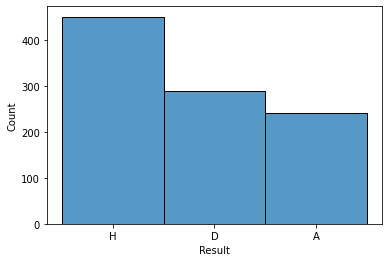

In [52]:
import seaborn as sns
sns.histplot(df.Result)

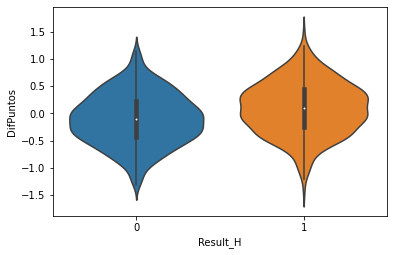

In [64]:
variable="DifPuntos"
import matplotlib.pyplot as plt
from matplotlib import style
fig, ax = plt.subplots(figsize=(6, 3.84))
sns.violinplot(
        x     = 'Result_H',
        y     = variable,
        data  = df,
        #color = "white",
        ax    = ax)

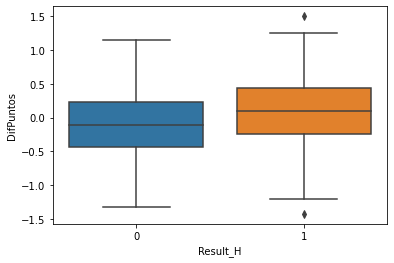

In [65]:
fig = sns.boxplot(x="Result_H", y=variable, data=df)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


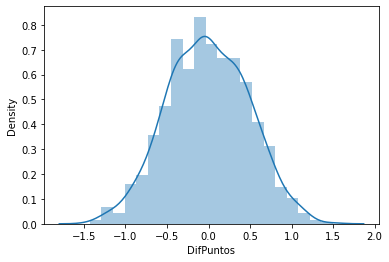

In [66]:
sns.distplot(df[variable])

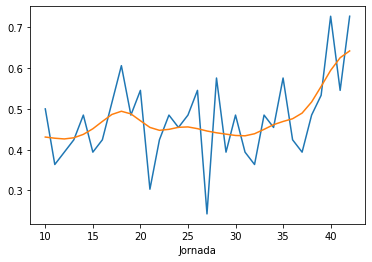

In [60]:
VictoriasJornas=df.groupby(['Jornada'])['Result_H'].mean()
VictoriasJornas.plot()
from scipy.ndimage.filters import gaussian_filter1d
ysmoothed = gaussian_filter1d(VictoriasJornas, sigma=2)
plt.plot(VictoriasJornas.index, ysmoothed)
plt.show()

In [73]:
# T-test entre clases
from statsmodels.stats.weightstats import ttest_ind

for variable in df.columns:
  if df[variable].dtype==int or df[variable].dtype==float:
    res_ttest = ttest_ind(
                x1 = df[df["Result_H"] == 0][variable],
                x2 = df[df["Result_H"] == 1][variable],
                alternative='two-sided'
            )
    if res_ttest[1]<0.05:
      print(f"t={res_ttest[0]}, p-value={res_ttest[1]}, variable={variable}")
#la hipotesis nula es muestras iguales. solo se muestran las variables significativamente importantes respecto a la victoria local

t=-3.5034266292671004, p-value=0.00048006326584560733, variable=LG
t=-3.620602797151294, p-value=0.00030896771763254583, variable=LGF
t=-2.413010711562572, p-value=0.016004025368489116, variable=LTP
t=-2.313030022100675, p-value=0.020927298304741878, variable=LC
t=-3.6450592205418872, p-value=0.0002813759752644478, variable=LGL
t=-3.6201716974101608, p-value=0.0003094761045416992, variable=LGFL
t=-2.1460969477803005, p-value=0.03211026551865451, variable=LTL
t=-2.746562452323822, p-value=0.006132708942555795, variable=LTPL
t=-2.2352869362593704, p-value=0.025623129721733626, variable=LCL
t=-3.5616978124527425, p-value=0.0003861875648496438, variable=LGU5P
t=2.2191084860095884, p-value=0.026707720957349114, variable=VG
t=-3.2668338915305344, p-value=0.0011253228772121822, variable=VGC
t=2.1473635298382043, p-value=0.032009089593908115, variable=VGV
t=-2.7678632723544907, p-value=0.005748851932951374, variable=VGCV
t=2.522733468578623, p-value=0.011801996040429582, variable=VGU5P
t=-6.48

/usr/local/lib/python3.8/dist-packages/statsmodels/stats/weightstats.py:650: RuntimeWarning: invalid value encountered in double_scalars
  tstat = (value1 - value2 - diff) / std_diff
